In [1]:
# Clone Dataset From Bitbucket
! git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [60]:
# Dataset isin Pickle Format
# importing Libraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report


In [61]:
# There is three folders in dataset train,test and valid
# Opening Datasets Subfolders
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)

In [62]:
# In this dataset basically all images is in dictionary 
type(train_data)


dict

In [63]:
# So we have to save features and labels seperately is in x_train and y_train variable 
x_train,y_train=train_data['features'],train_data['labels']
x_test,y_test=test_data['features'],test_data['labels']
x_val,y_val=val_data['features'],val_data['labels']

In [64]:
# Now we are able to read
# Just find shape first
x_train.shape



(34799, 32, 32, 3)

In [65]:
x_test.shape

(12630, 32, 32, 3)

In [66]:
x_val.shape

(4410, 32, 32, 3)

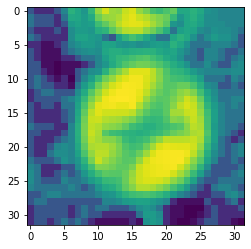

In [71]:
# Now we know how many images in folders and is in which format
plt.imshow(x_train[0])

In [68]:
print(y_train[0])

41


In [69]:
# Convert images into grayscale for better result
def gray(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
# equalizing images 
def equalize(img):
  img = cv2.equalizeHist(img)
  return img
# Combining all function and normalizing images
def preprocess(img):
  img = gray(img)
  img = equalize(img)
  img = img/255
  return img

In [70]:
# Its not possible for us to read images one by one so we use map here
x_train = np.array(list(map(preprocess,x_train)))
x_test = np.array(list(map(preprocess,x_test)))
x_val = np.array(list(map(preprocess,x_val)))

In [72]:
# Changing label data into categorical 
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [73]:
# reshape images into gray scale which is 1
x_train=x_train.reshape(34799, 32, 32, 1)
x_test=x_test.reshape(12630, 32, 32, 1)
x_val=x_val.reshape(4410, 32, 32, 1)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [75]:
# All preprocessing Done lets start building our cnn model
model=Sequential()

In [76]:
model.add(Conv2D(32,(5,5),input_shape=(32,32,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(20,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(43,activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 20)        5780      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               360500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [84]:
# Lets fit model
model.fit(x_train,y_train,epochs=20,batch_size=400,verbose=1,shuffle=1)

Epoch 1/20
87/87 [==============================] - 1s 8ms/step - loss: 2.5173 - accuracy: 0.3308
Epoch 2/20
87/87 [==============================] - 1s 7ms/step - loss: 0.8585 - accuracy: 0.7389
Epoch 3/20
87/87 [==============================] - 1s 7ms/step - loss: 0.4628 - accuracy: 0.8614
Epoch 4/20
87/87 [==============================] - 1s 8ms/step - loss: 0.3059 - accuracy: 0.9089
Epoch 5/20
87/87 [==============================] - 1s 8ms/step - loss: 0.2267 - accuracy: 0.9341
Epoch 6/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1760 - accuracy: 0.9501
Epoch 7/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1425 - accuracy: 0.9578
Epoch 8/20
87/87 [==============================] - 1s 8ms/step - loss: 0.1145 - accuracy: 0.9676
Epoch 9/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0946 - accuracy: 0.9739
Epoch 10/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0806 - accuracy: 0.9774
Epoch 11/20
87/87 [

In [85]:
y_test = np.argmax(y_test,axis=1)

In [86]:
prediction=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [89]:
model.save('Sign_classifier.h5')

In [90]:
prediction[0]

16

In [88]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.53      0.86      0.66        37
           1       0.96      0.92      0.94       748
           2       0.98      0.92      0.95       796
           3       0.91      0.95      0.93       428
           4       0.90      0.92      0.91       647
           5       0.88      0.85      0.87       649
           6       0.69      0.99      0.82       105
           7       0.90      0.93      0.91       437
           8       0.92      0.88      0.90       471
           9       1.00      0.98      0.99       488
          10       0.99      0.99      0.99       663
          11       0.97      0.96      0.96       426
          12       0.98      0.96      0.97       702
          13       0.99      0.99      0.99       723
          14       0.96      0.99      0.97       262
          15       0.92      0.97      0.95       200
          16       0.99      1.00      1.00       149
          17       0.97    

Congratulation